In [10]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


In [96]:
def rma_pathloss(D=1000):

    r = np.linspace(1, D, D)
    fc = 2.593 # n41
    fc = 3.550 # n78

    W = 20
    h = 5
    hBS = 35
    hUT = 1.5
    
    PL = 161.04 - 7.1 * np .log10(W)+ +7.5*np.log10(h)
    PL = PL - (24.37 - 3.7 * np.power(h/hBS, 2))* np.log10(hBS)
    PL = PL + (43.42 - 3.1 * np.log10(hBS)) *(np.log10(r) -3)
    PL = PL + 20 * np.log10(fc) - np.power ((3.2 * (np.log10(11.75 * hUT))), 2) - 4.97
    return r, PL

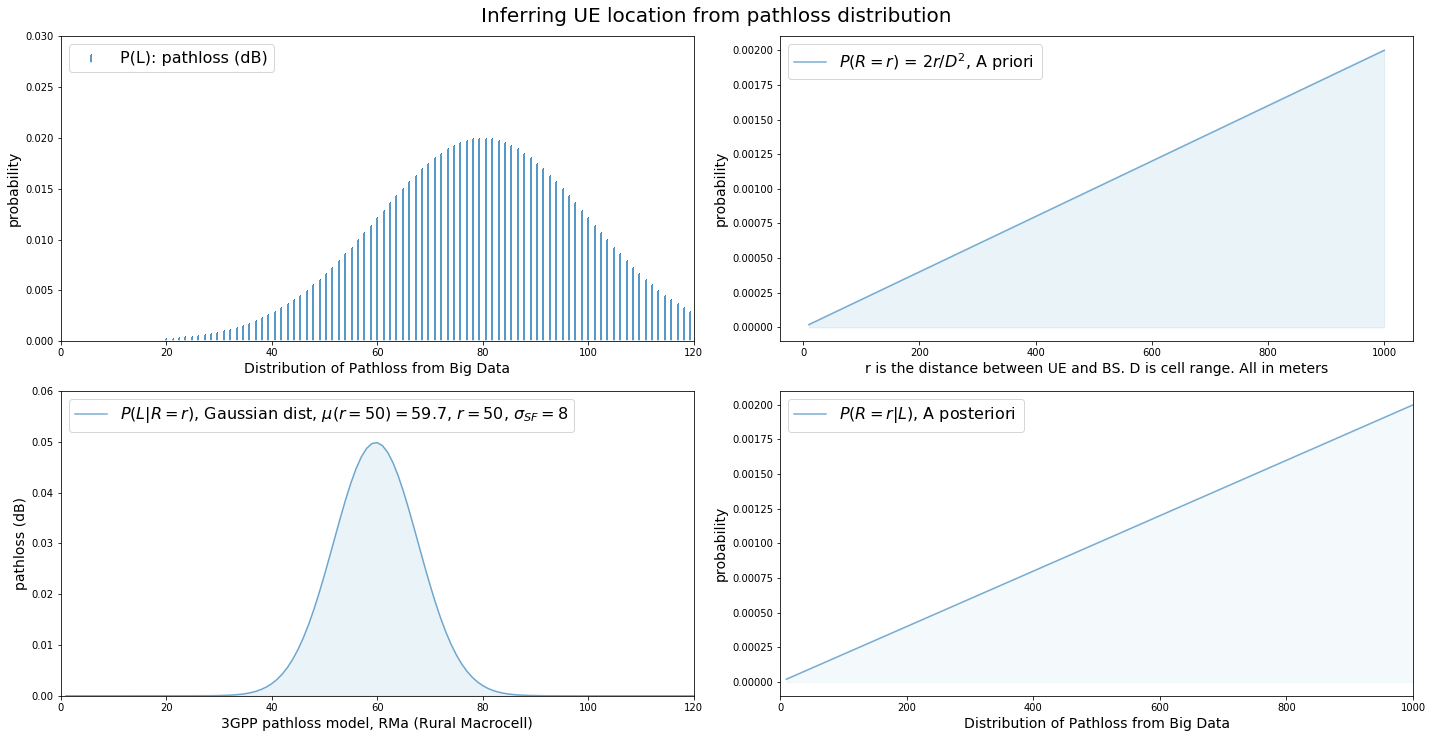

In [149]:
fig,axs= plt.subplots(2, 2, sharex='none', sharey='col')
fig.set_size_inches((20,10))
plt.subplots_adjust(hspace=.3)
legend_size = 16
label_size = 14
font_size = 14

# -------------
# Fig1: P(L)
# -------------

ax = plt.subplot(2, 2, 1)
ax.set_xlim([0, 120]) 
ax.set_ylim([0, 0.03]) 
#draw Gaussian
mu = 80
sigma = 20
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ProbPathLoss = stats.norm.pdf(x, mu, sigma)

plt.stem(x, ProbPathLoss, use_line_collection=True, basefmt='w',  markerfmt=',', label = "P(L): pathloss (dB)")
plt.xlabel("Distribution of Pathloss from Big Data", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})

# -------------
# Fig2: P(R)
# ------------
ax = plt.subplot(2, 2, 2)
D = 1000
r = np.linspace(10, D, D)
pR = (2/np.power(D,2))*r
plt.plot(r,pR, label = r"$P(R=r)$ = $2r/D^2$"+", A priori ", alpha=0.6)
plt.fill_between(r, 0, pR, color="#348ABD", alpha=0.1)
plt.xlabel("r is the distance between UE and BS. D is cell range. All in meters", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})




# -------------
# Fig3: P(L|R)
# ------------
ax = plt.subplot(2, 2, 3)
ax.set_xlim([0, 120]) 
ax.set_ylim([0, 0.06]) 

D = 1000
r, PL = rma_pathloss(D)

mu_r = PL[50]
sigma = 8

x = np.linspace(mu_r - 3 * sigma, mu_r + 3 * sigma, 100)
x=r
PLgivenR = stats.norm.pdf(x, mu_r, sigma)


plt.plot(x, PLgivenR, label = r"$P(L|R=r)$, Gaussian dist, $\mu(r=50)=59.7$, $r=50$, $\sigma_{SF}=8$", alpha=0.6)
plt.fill_between(x, 0, PLgivenR, color="#348ABD", alpha=0.1)
plt.xlabel("3GPP pathloss model, RMa (Rural Macrocell)", fontsize=font_size)
plt.ylabel("pathloss (dB)", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})


# -------------
# Fig4: P(R|L)
# ------------
ax = plt.subplot(2, 2, 4)
ax.set_xlim([0, 1000]) 
# ax.set_ylim([0, 0.06]) 





D = 1000
r = np.linspace(10, D, D)
pR = (2/np.power(D,2))*r
plt.plot(r,pR, label = r"$P(R=r|L)$"+", A posteriori ", alpha=0.6)
plt.fill_between(r, 0, pR, color="#348ABD", alpha=0.05)
plt.xlabel("r is the distance between UE and BS. D is cell range. All in meters", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})



plt.xlabel("Distribution of Pathloss from Big Data", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})




# -------------
# Final
# ------------


plt.suptitle("Inferring UE location from pathloss distribution",
             y=1.02,
             fontsize=20)

plt.tight_layout()
plt.show()


In [125]:
mu_r

59.73518050418568

In [230]:

ls = np.linspace(1, 120, 120)
rs, PL = rma_pathloss(D)
sigma = 8



In [231]:
mu_r = PL[3]
q = stats.norm.sf(rs, mu_r, sigma)
mu_r


17.02557542339536

0.011957462909755079

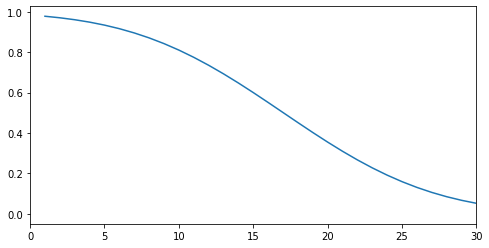

In [232]:

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rs, q)
ax.set_xlim([0, 30])
q[2]-q[3]

In [233]:
l

120.0

In [234]:
len(PL)

1001

In [257]:
for l in range(120):
    for r in range(D):
        i = np.int_(r)
        mu_r = PL[i-1]
        q = stats.norm.sf(rs, mu_r, sigma)
        delta = q[l]-q[l+1]
        pLgivenR = delta * ( 2 * r +1)/D
 



In [225]:


l

120.0

In [216]:
r

1.0